# Sudeste Module 3 Exam

### Instructions
Modify this notebook to compose your model. You may use additional `.py` files within this folder, `src/` for composing your framework.

It is discouraged to rename the `notebook.ipynb` for this particular task.

<div style="background-color: #f7f7f7; border: 1px solid #e1e1e1; border-radius: 5px; padding: 15px; max-width: 400px;">
    <h2 style="color: #333333; font-family: Arial, sans-serif;">Submitted by Group 6</h2>
    <ul style="color: #555555; font-family: Arial, sans-serif; font-size: 16px;">
        <li>Aguaviva, Christopher</li>
        <li>Baluyot, Kent Ryan</li>
        <li>Berida, Ronabelle</li>
    </ul>
</div>


### <span style="color:Orange;">  Table of Contents: </span>

I.    [Executive Summary](#summary)

II.   [Problem Statement](#problem)

III.  [Objective](#objective)

IV.   [Data Cleaning](#datacleaning)

V.    [Visualizations and EDA](#eda)

VI.   [ARIMA Model](#arima)

VII.  [Deep Learning Model](#dl)
  
VIII. [Comparison](#comparison)

IX.   [Conclusion and Recommendations](#conclusion)

***

## <span style="color:Orange;"> I. Executive Summary </span>  <a name="summary"></a>
`edit contents`

## <span style="color:Orange;"> II. Problem Statement </span>  <a name="problem"></a>  
`edit contents`

## <span style="color:Orange;"> III. Objective </span>  <a name="objective"></a>  
`edit contents`

## <span style="color:Orange;"> IV. Data Cleaning </span>  <a name="datacleaning"></a>  

Importing Modules

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import tensorflow as tf

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
#from datetime import datetime

pd.set_option('display.max_columns', 40)   # displays max columns of the DataFrame 

In [2]:
# Importing necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('sudeste.csv')

# Display the first few rows of the dataset
df.head()


,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,2007-11-06,2007,11,6,0,NaN,982.5,982.5,981.3,NaN,29.3,12.1,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,2007-11-06,2007,11,6,1,NaN,983.2,983.2,982.5,NaN,29.0,13.5,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,2007-11-06,2007,11,6,2,NaN,983.5,983.5,983.2,NaN,27.4,14.0,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,2007-11-06,2007,11,6,3,NaN,983.7,983.7,983.4,NaN,25.8,16.9,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,2007-11-06,2007,11,6,4,NaN,983.7,983.8,983.6,NaN,25.4,16.4,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Data transformation (if necessary)
# For example, converting date-time columns to proper format
df['mdct'] = pd.to_datetime(df['mdct'])

# Explore the dataset after transformations
print("Dataset Info After Data Transformations:\n")
print(df.info())

Missing Values:
 wsid          0
wsnm          0
elvt          0
lat           0
lon           0
inme          0
city          0
prov          0
mdct          0
date          0
yr            0
mo            0
da            0
hr            0
prcp    8371184
stp           0
smax          0
smin          0
gbrd    4108820
temp         31
dewp        475
tmax         26
dmax        310
tmin         34
dmin        807
hmdy          0
hmax         12
hmin         44
wdsp     925561
wdct          0
gust     316474
dtype: int64
Dataset Info After Data Transformations:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779168 entries, 0 to 9779167
Data columns (total 31 columns):
 #   Column  Dtype         
---  ------  -----         
 0   wsid    int64         
 1   wsnm    object        
 2   elvt    float64       
 3   lat     float64       
 4   lon     float64       
 5   inme    object        
 6   city    object        
 7   prov    object        
 8   mdct    datetime64[ns]
 9   date  

## <span style="color:Orange;"> V. Visualizations and EDA </span>  <a name="eda"></a>  

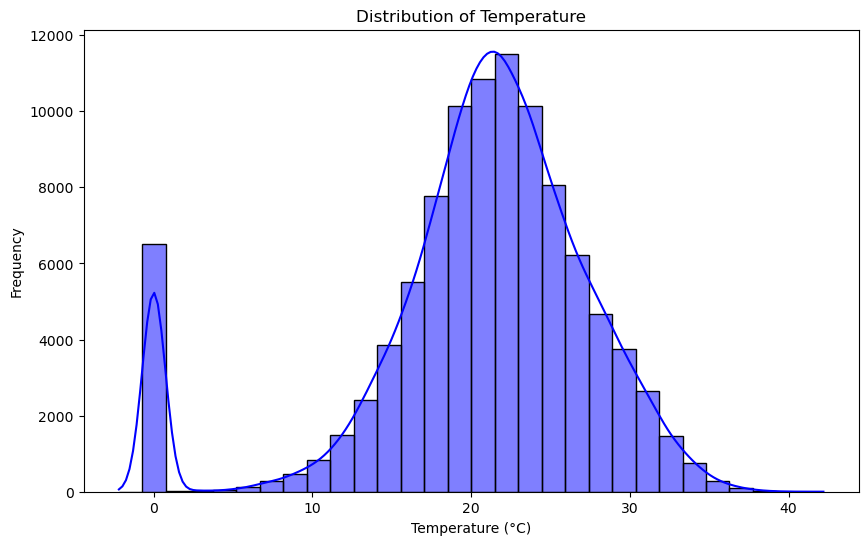

In [4]:
# Visualize the distribution of temperature
plt.figure(figsize=(10, 6))
sns.histplot(df['temp'].sample(n=100000), bins=30, kde=True, color='blue')  # Sample a subset of data for visualization
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

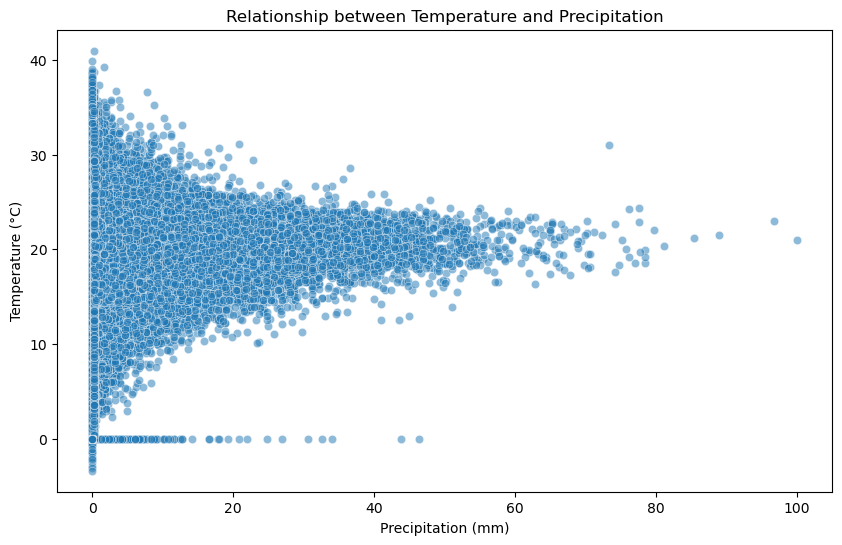

In [5]:
# Visualize the relationship between temperature and precipitation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='prcp', y='temp', data=df, alpha=0.5)
plt.title('Relationship between Temperature and Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Temperature (°C)')
plt.show()

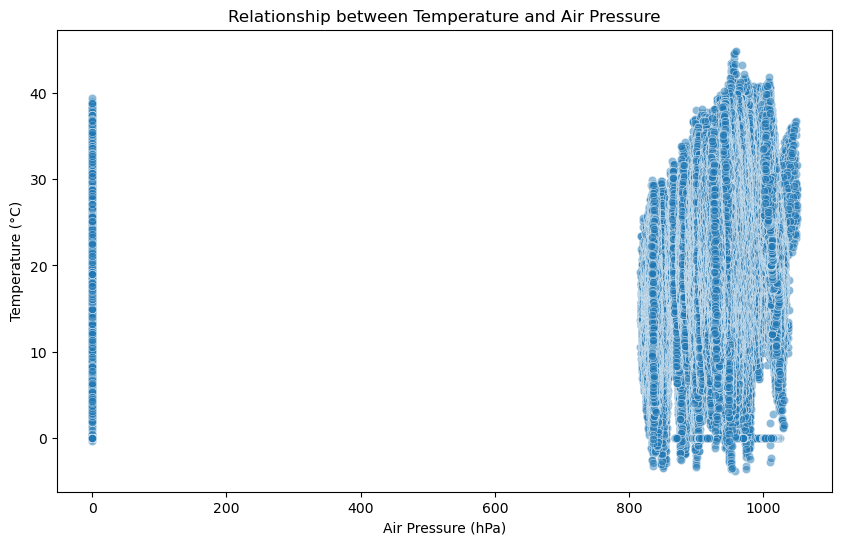

In [6]:
# Visualize the relationship between temperature and air pressure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stp', y='temp', data=df, alpha=0.5)
plt.title('Relationship between Temperature and Air Pressure')
plt.xlabel('Air Pressure (hPa)')
plt.ylabel('Temperature (°C)')
plt.show()

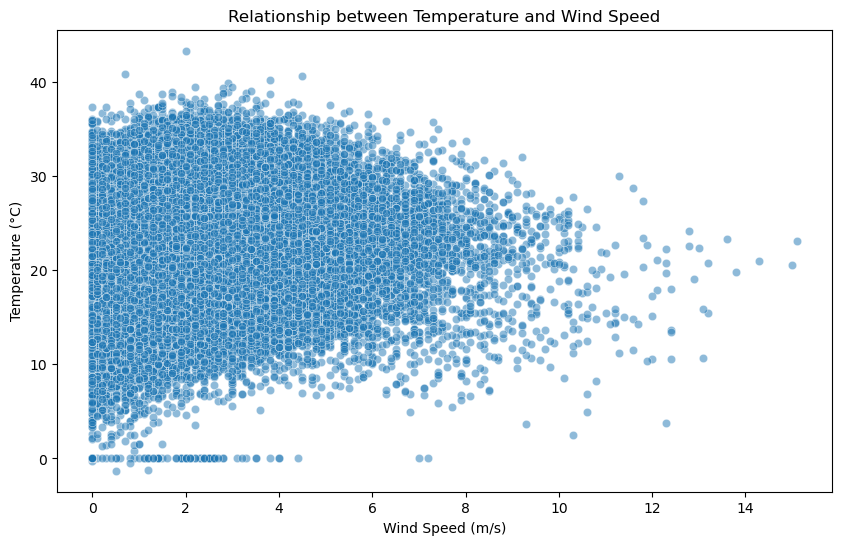

In [7]:
# Visualize the relationship between temperature and wind speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wdsp', y='temp', data=df.sample(n=100000), alpha=0.5)  # Sample a subset of data for visualization
plt.title('Relationship between Temperature and Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Temperature (°C)')
plt.show()

## <span style="color:Orange;"> VII. Deep Learning Model </span>  <a name="dl"></a>  
 

# <span style="color:Orange;"> IX. Comparison </span> <a name="Comparison"></a>  
`edit contents`

# <span style="color:Orange;"> IX. Conclusion and Recommendation </span> <a name="conclusion"></a>  
`edit contents`